### Class 7- Starter code


In [35]:
%matplotlib inline
from os.path import join
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [43]:
y = np.arange(5)
print y
y_hat = y
metrics.mean_squared_error(y, y_hat)

[0 1 2 3 4]


0.0

In [46]:
y_hat = y[::-1]
print y_hat
metrics.mean_squared_error(y, y_hat)

[4 3 2 1 0]


8.0

### Create sample data and fit a model

In [47]:
df = pd.DataFrame({'x': range(100), 'y': range(100)})
biased_df  = df.copy()
biased_df.loc[:20, 'x'] = 1
biased_df.loc[:20, 'y'] = 1

def append_jitter(series):
    jitter = np.random.random_sample(size=100)
    return series + jitter

df['x'] = append_jitter(df.x)
df['y'] = append_jitter(df.y)

biased_df['x'] = append_jitter(biased_df.x)
biased_df['y'] = append_jitter(biased_df.y)

In [48]:
# Fit:
lm = linear_model.LinearRegression().fit(df[['x']], df['y'])
metrics.mean_squared_error(df['y'], lm.predict(df[['x']]))

0.16602718000795316

In [49]:
## biased fit
lm = linear_model.LinearRegression().fit(biased_df[['x']], biased_df['y'])
metrics.mean_squared_error(df['y'], lm.predict(df[['x']]))

0.1673954533998657

## Cross validation
#### Intro to cross validation with bike share data from last time. We will be modeling casual ridership. 

In [50]:
from sklearn import cross_validation
bikeshare = pd.read_csv(join('..', 'data', 'bikeshare.csv'))

#### Create dummy variables and set outcome (dependent) variable

In [51]:
weather = pd.get_dummies(bikeshare.weathersit, prefix='weather')
modeldata = bikeshare[['temp', 'hum']].join(weather[['weather_1', 'weather_2', 'weather_3']])
y = bikeshare.casual 

#### Create a cross valiation with 5 folds

Mean of MSE for 3 folds: 1817.58711453
Mean of MSE for 5 folds: 1780.97924083
Mean of MSE for 7 folds: 1736.12757027
Mean of MSE for 9 folds: 1737.87152693
Mean of MSE for 11 folds: 1727.55234543
Mean of MSE for 13 folds: 1720.22017285
Mean of MSE for 15 folds: 1729.15209047
Mean of MSE for 17 folds: 1711.62322766
Mean of MSE for 19 folds: 1714.26252611
Mean of MSE for 21 folds: 1709.58321257
Mean of MSE for 23 folds: 1709.01858956
Mean of MSE for 25 folds: 1704.95746641
Mean of MSE for 27 folds: 1706.9394101
Mean of MSE for 29 folds: 1700.56093245
Mean of MSE for 31 folds: 1703.95350075
Mean of MSE for 33 folds: 1699.96360776
Mean of MSE for 35 folds: 1700.15087471
Mean of MSE for 37 folds: 1699.75311293
Mean of MSE for 39 folds: 1696.00994702
Mean of MSE for 41 folds: 1697.25567268
Mean of MSE for 43 folds: 1695.44395904
Mean of MSE for 45 folds: 1697.47257937
Mean of MSE for 47 folds: 1692.71889465
Mean of MSE for 49 folds: 1692.5080456


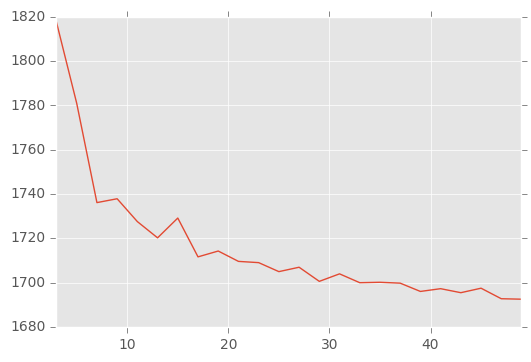

In [59]:
mse_avg = {}
for n_folds in range(3, 50, 2):
    kf = cross_validation.KFold(len(modeldata), n_folds=n_folds, shuffle=False)
    mse_values = []
    scores = []
    n= 0
#     print "~~~~ CROSS VALIDATION each fold ~~~~"
    for train_index, test_index in kf:
        lm = linear_model.LinearRegression().fit(modeldata.iloc[train_index], y.iloc[train_index])
        mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lm.predict(modeldata.iloc[test_index])))
        scores.append(lm.score(modeldata, y))
        n+=1
#         print 'Model', n
#         print 'MSE:', mse_values[n-1]
#         print 'R2:', scores[n-1]


#     print "~~~~ SUMMARY OF CROSS VALIDATION ~~~~"
    mse_avg[n_folds] = np.mean(mse_values)
    print 'Mean of MSE for {} folds:'.format(n_folds), np.mean(mse_values)
#     print 'Mean of R2 for all folds:', np.mean(scores)
pd.Series(mse_avg).plot();

In [57]:
lm = linear_model.LinearRegression().fit(modeldata, y)
print "~~~~ Single Model ~~~~"
print 'MSE of single model:', metrics.mean_squared_error(y, lm.predict(modeldata))
print 'R2: ', lm.score(modeldata, y)

~~~~ Single Model ~~~~
MSE of single model: 1672.58110765
R2:  0.311934605989


### Check
While the cross validated approach here generated more overall error, which of the two approaches would predict new data more accurately: the single model or the cross validated, averaged one? Why?


Answer: 

### There are ways to improve our model with regularization. 
Let's check out the effects on MSE and R2

In [60]:
lm = linear_model.LinearRegression().fit(modeldata, y)
print "~~~ OLS ~~~"
print 'OLS MSE: ', metrics.mean_squared_error(y, lm.predict(modeldata))
print 'OLS R2:', lm.score(modeldata, y)

lm = linear_model.Lasso().fit(modeldata, y)
print "~~~ Lasso ~~~"
print 'Lasso MSE: ', metrics.mean_squared_error(y, lm.predict(modeldata))
print 'Lasso R2:', lm.score(modeldata, y)

lm = linear_model.Ridge().fit(modeldata, y)
print "~~~ Ridge ~~~"
print 'Ridge MSE: ', metrics.mean_squared_error(y, lm.predict(modeldata))
print 'Ridge R2:', lm.score(modeldata, y)

~~~ OLS ~~~
OLS MSE:  1672.58110765
OLS R2: 0.311934605989
~~~ Lasso ~~~
Lasso MSE:  1725.41581608
Lasso R2: 0.290199495922
~~~ Ridge ~~~
Ridge MSE:  1672.60490113
Ridge R2: 0.311924817843


### Figuring out the alphas can be done by "hand"

In [63]:
alphas = np.logspace(-10, 10, 21)
print alphas
for a in alphas:
    print 'Alpha:', a
    lm = linear_model.Ridge(alpha=a)
    lm.fit(modeldata, y)
    print lm.coef_
    print metrics.mean_squared_error(y, lm.predict(modeldata))

[  1.00000000e-10   1.00000000e-09   1.00000000e-08   1.00000000e-07
   1.00000000e-06   1.00000000e-05   1.00000000e-04   1.00000000e-03
   1.00000000e-02   1.00000000e-01   1.00000000e+00   1.00000000e+01
   1.00000000e+02   1.00000000e+03   1.00000000e+04   1.00000000e+05
   1.00000000e+06   1.00000000e+07   1.00000000e+08   1.00000000e+09
   1.00000000e+10]
Alpha: 1e-10
[ 112.68901765  -84.01121684  -24.68489063  -21.00314493  -21.71893628]
1672.58110765
Alpha: 1e-09
[ 112.68901765  -84.01121684  -24.6848906   -21.00314491  -21.71893626]
1672.58110765
Alpha: 1e-08
[ 112.68901765  -84.01121684  -24.6848904   -21.00314471  -21.71893606]
1672.58110765
Alpha: 1e-07
[ 112.68901763  -84.01121682  -24.68488837  -21.00314268  -21.71893403]
1672.58110765
Alpha: 1e-06
[ 112.68901745  -84.01121667  -24.68486804  -21.00312237  -21.71891373]
1672.58110765
Alpha: 1e-05
[ 112.68901562  -84.01121509  -24.68466472  -21.00291929  -21.71871079]
1672.58110765
Alpha: 0.0001
[ 112.68899732  -84.01119938

### Or we can use grid search to make this faster

In [65]:
from sklearn import grid_search

alphas = np.logspace(-10, 10, 21)
gs = grid_search.GridSearchCV(
    cv=5,
    estimator=linear_model.Ridge(),
    param_grid={'alpha': alphas, 'fit_intercept': [True, False]},
    scoring='neg_mean_squared_error')

gs.fit(modeldata, y)


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-10,   1.00000e-09,   1.00000e-08,   1.00000e-07,
         1.00000e-06,   1.00000e-05,   1.00000e-04,   1.00000e-03,
         1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04,   1.00000e+05,
         1.00000e+06,   1.00000e+07,   1.00000e+08,   1.00000e+09,
         1.00000e+10]), 'fit_intercept': [True, False]},
       pre_dispatch='2*n_jobs', refit=True,
       scoring='neg_mean_squared_error', verbose=0)

##### Best score 

In [66]:
print gs.best_score_

-1777.68141688


##### mean squared error here comes in negative, so let's make it positive.

In [67]:
print -gs.best_score_ 

1777.68141688


##### explains which grid_search setup worked best

In [68]:
print gs.best_estimator_ 

Ridge(alpha=10.0, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


##### shows all the grid pairings and their performances.

In [22]:
print gs.grid_scores_ 

[mean: -1780.95367, std: 946.92422, params: {'alpha': 1e-10, 'fit_intercept': True}, mean: -1781.84322, std: 946.91796, params: {'alpha': 1e-10, 'fit_intercept': False}, mean: -1780.95367, std: 946.92422, params: {'alpha': 1.0000000000000001e-09, 'fit_intercept': True}, mean: -1781.84322, std: 946.91796, params: {'alpha': 1.0000000000000001e-09, 'fit_intercept': False}, mean: -1780.95367, std: 946.92422, params: {'alpha': 1e-08, 'fit_intercept': True}, mean: -1781.84322, std: 946.91796, params: {'alpha': 1e-08, 'fit_intercept': False}, mean: -1780.95367, std: 946.92422, params: {'alpha': 9.9999999999999995e-08, 'fit_intercept': True}, mean: -1781.84322, std: 946.91796, params: {'alpha': 9.9999999999999995e-08, 'fit_intercept': False}, mean: -1780.95367, std: 946.92423, params: {'alpha': 9.9999999999999995e-07, 'fit_intercept': True}, mean: -1781.84322, std: 946.91796, params: {'alpha': 9.9999999999999995e-07, 'fit_intercept': False}, mean: -1780.95367, std: 946.92423, params: {'alpha':

## Gradient Descent

In [87]:
num_to_approach = 6.2
start = 0.
steps = [-1, 1]
optimized = False
a=0
while not optimized:
    print 'iteration', a
    current_distance = num_to_approach - start
    print '\tcurrent distance', current_distance
    got_better = False
    next_steps = [start + i for i in steps]
    for n in next_steps:
        distance = np.abs(num_to_approach - n)
        if distance < current_distance:
            got_better = True
            print '\tdistance', distance, 'is better than', current_distance
            current_distance = distance
            start = n
    if got_better:
        print '\tfound better solution! using', current_distance
        a += 1
    else:
        optimized = True
        print start, 'is closest to', num_to_approach


iteration 0
	current distance 6.2
	distance 5.2 is better than 6.2
	found better solution! using 5.2
iteration 1
	current distance 5.2
	distance 4.2 is better than 5.2
	found better solution! using 4.2
iteration 2
	current distance 4.2
	distance 3.2 is better than 4.2
	found better solution! using 3.2
iteration 3
	current distance 3.2
	distance 2.2 is better than 3.2
	found better solution! using 2.2
iteration 4
	current distance 2.2
	distance 1.2 is better than 2.2
	found better solution! using 1.2
iteration 5
	current distance 1.2
	distance 0.2 is better than 1.2
	found better solution! using 0.2
iteration 6
	current distance 0.2
6.0 is closest to 6.2


###Bonus: 
implement a stopping point, similar to what n_iter would do in gradient descent when we've reached "good enough"

## Demo: Application of Gradient Descent 

In [88]:
lm = linear_model.SGDRegressor()
lm.fit(modeldata, y)
print "Gradient Descent R2:", lm.score(modeldata, y)
print "Gradient Descent MSE:", metrics.mean_squared_error(y, lm.predict(modeldata))

Gradient Descent R2: 0.308539257363
Gradient Descent MSE: 1680.83467776


### Check: Untuned, how well did gradient descent perform compared to OLS?

Answer: 

# Independent Practice: Bike data revisited

There are tons of ways to approach a regression problem. The regularization techniques appended to ordinary least squares optimizes the size of coefficients to best account for error. Gradient Descent also introduces learning rate (how aggressively do we solve the problem), epsilon (at what point do we say the error margin is acceptable), and iterations (when should we stop no matter what?)

For this deliverable, our goals are to:

- implement the gradient descent approach to our bike-share modeling problem,
- show how gradient descent solves and optimizes the solution,
- demonstrate the grid_search module!

While exploring the Gradient Descent regressor object, you'll build a grid search using the stochastic gradient descent estimator for the bike-share data set. Continue with either the model you evaluated last class or the simpler one from today. In particular, be sure to implement the "param_grid" in the grid search to get answers for the following questions:

- With a set of alpha values between 10^-10 and 10^-1, how does the mean squared error change?
- Based on the data, we know when to properly use l1 vs l2 regularization. By using a grid search with l1_ratios between 0 and 1 (increasing every 0.05), does that statement hold true? If not, did gradient descent have enough iterations?
- How do these results change when you alter the learning rate (eta0)?

**Bonus**: Can you see the advantages and disadvantages of using gradient descent after finishing this exercise?

### Starter Code

In [92]:
linear_model.SGDRegressor?

In [90]:
params = {} # put your gradient descent parameters here
gs = grid_search.GridSearchCV(
    estimator=linear_model.SGDRegressor(),
    cv=cross_validation.KFold(len(modeldata), n_folds=5, shuffle=True),
    param_grid=params,
    scoring='neg_mean_squared_error',
    )

gs.fit(modeldata, y)

print 'BEST ESTIMATOR'
print -gs.best_score_
print gs.best_estimator_
print 'ALL ESTIMATORS'
print gs.grid_scores_

BEST ESTIMATOR
1689.7527876
SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)
ALL ESTIMATORS
[mean: -1689.75279, std: 53.67508, params: {}]


In [19]:
## go for it!